In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
####################################### laser focused (end of rails) #######################################
# load data w/ laser on: data{tint}
data1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_1.00269_5.fits")
data2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_2.502526_5.fits")
data5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_5.002251_5.fits")
data10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_10.001702_5.fits")
data25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_25.000055_5.fits")
data50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_50.000493999999996_5.fits")
data100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_100.001373_5.fits")
data200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_199.996761_5.fits")
datas = [data1, data2_5, data5, data10, data25, data50, data100, data200]

# load darks
dark1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_1.00269_5.fits")
dark2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_2.502526_5.fits")
dark5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_5.002251_5.fits")
dark10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_10.001702_5.fits")
dark25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_25.000055_5.fits")
dark50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_50.000493999999996_5.fits")
dark100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_100.001373_5.fits")
dark200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_199.996761_5.fits")
darks = [dark1, dark2_5, dark5, dark10, dark25, dark50, dark100, dark200]

In [4]:
################################################# laser defocused (80% of rails) #################################################
# load data w/ laser on: data{tint}
data1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_1.00269_5.fits")
data2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_2.502526_5.fits")
data5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_5.002251_5.fits")
data10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_10.001702_5.fits")
data25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_25.000055_5.fits")
data50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_50.000493999999996_5.fits")
data100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_100.001373_5.fits")
data200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\-40.0C_199.996761_5.fits")
datas = [data1, data2_5, data5, data10, data25, data50, data100, data200]

# load darks
dark1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_1.00269_5.fits")
dark2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_2.502526_5.fits")
dark5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_5.002251_5.fits")
dark10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_10.001702_5.fits")
dark25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_25.000055_5.fits")
dark50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_50.000493999999996_5.fits")
dark100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_100.001373_5.fits")
dark200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_199.996761_5.fits")
darks = [dark1, dark2_5, dark5, dark10, dark25, dark50, dark100, dark200]

In [5]:
################################################# laser defocused (80% of rails), 5% main power, 10% channel power; see if flux is nonlinear at higher power #################################################
# load data w/ laser on: data{tint}
data1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_1.00269_5.fits")
data2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_2.502526_5.fits")
data5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_5.002251_5.fits")
data10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_10.001702_5.fits")
data25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_25.000055_5.fits")
data50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_50.000493999999996_5.fits")
data100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_100.001373_5.fits")
data200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_10\-40.0C_199.996761_5.fits")
datas = [data1, data2_5, data5, data10, data25, data50, data100, data200]

# load darks
dark1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_1.00269_5.fits")
dark2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_2.502526_5.fits")
dark5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_5.002251_5.fits")
dark10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_10.001702_5.fits")
dark25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_25.000055_5.fits")
dark50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_50.000493999999996_5.fits")
dark100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_100.001373_5.fits")
dark200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_199.996761_5.fits")
darks = [dark1, dark2_5, dark5, dark10, dark25, dark50, dark100, dark200]

In [6]:
################################################# laser defocused (80% of rails), 5% main power, 7% channel power; see if flux is nonlinear at higher power #################################################
# load data w/ laser on: data{tint}
data1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_1.00269_5.fits")
data2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_2.502526_5.fits")
data5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_5.002251_5.fits")
data10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_10.001702_5.fits")
data25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_25.000055_5.fits")
data50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_50.000493999999996_5.fits")
data100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_100.001373_5.fits")
data200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\-40.0C_199.996761_5.fits")
datas = [data1, data2_5, data5, data10, data25, data50, data100, data200]

# load darks
dark1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_1.00269_5.fits")
dark2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_2.502526_5.fits")
dark5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_5.002251_5.fits")
dark10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_10.001702_5.fits")
dark25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_25.000055_5.fits")
dark50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_50.000493999999996_5.fits")
dark100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_100.001373_5.fits")
dark200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\darks\-40.0C_199.996761_5.fits")
darks = [dark1, dark2_5, dark5, dark10, dark25, dark50, dark100, dark200]

In [7]:
################################################# laser defocused (80% of rails), 5% main power, 7% channel power; more points #################################################
# load data w/ laser on: data{tint}
data1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_1.001373_1.fits")
data10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_10.000383999999999_1.fits")
data25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_25.001922_1.fits")
data50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_50.002361_1.fits")
data75 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_75.0028_1.fits")
data100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_100.000055_1.fits")
data125 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_125.00049399999999_1.fits")
data150 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_150.000933_1.fits")
data175 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_175.001373_1.fits")
data200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_200.001812_1.fits")
data250 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_250.00269000000003_1.fits")
data300 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_300.000384_1.fits")
data350 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_350.001263_1.fits")
data400 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_400.002141_1.fits")
data450 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_450.00302_1.fits")
data500 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_500.000714_1.fits")
data600 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_600.002471_1.fits")
data700 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_700.001043_1.fits")
data800 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_800.0028_1.fits")
data900 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_900.0013730000001_1.fits")
data1000 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\-40.0C_999.996761_1.fits")
datas = [data1, data10, data25, data50, data75, data100, data125, data150, data175, data200, data250, data300, data350, data400, data450, data500, data600, data700, data800, data900, data1000]


# load darks
dark1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_1.001373_1.fits")
dark10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_10.000383999999999_1.fits")
dark25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_25.001922_1.fits")
dark50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_50.002361_1.fits")
dark75 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_75.0028_1.fits")
dark100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_100.000055_1.fits")
dark125 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_125.00049399999999_1.fits")
dark150 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_150.000933_1.fits")
dark175 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_175.001373_1.fits")
dark200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_200.001812_1.fits")
dark250 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_250.00269000000003_1.fits")
dark300 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_300.000384_1.fits")
dark350 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_350.001263_1.fits")
dark400 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_400.002141_1.fits")
dark450 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_450.00302_1.fits")
dark500 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_500.000714_1.fits")
dark600 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_600.002471_1.fits")
dark700 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_700.001043_1.fits")
dark800 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_800.0028_1.fits")
dark900 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_900.0013730000001_1.fits")
dark1000 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\defocused80\channelpower_7\morepoints\darks\-40.0C_999.996761_1.fits")
darks = [dark1, dark10, dark25, dark50, dark75, dark100, dark125, dark150, dark175, dark200, dark250, dark300, dark350, dark400, dark450, dark500, dark600, dark700, dark800, dark900, dark1000]

In [8]:
# average data and darks over 10 exposures
datas_avg = [np.median(data, axis=0) for data in datas]
darks_avg = [np.median(dark, axis=0) for dark in darks]

# subtract darks from data files
datas_sub = [data - dark for data, dark in zip(datas_avg, darks_avg)]

# slice data to get region w/ laser; find region manually with ds9

# focused
# datas_slice = [data[312:339, 303:329] for data in datas_sub]

# defocused #1; shows linearity
# datas_slice = [data[285:340, 285:340] for data in datas_sub]

# defoucsed #2
# datas_slice = [data[276:342, 288:345] for data in datas_sub]

# defoucsed #3
# datas_slice = [data[272:345, 290:344] for data in datas_sub]

# defocused #4: index [:5] points because pixels saturate and act weird
datas_slice = [data[280:340, 283:346] for data in datas_sub]

# get mean pixel value in region; this corresponds to the brightness(?)
means = [np.median(data) for data in datas_slice]

RMS of residuals to 4th order polynomial fit: 30.695001475955927


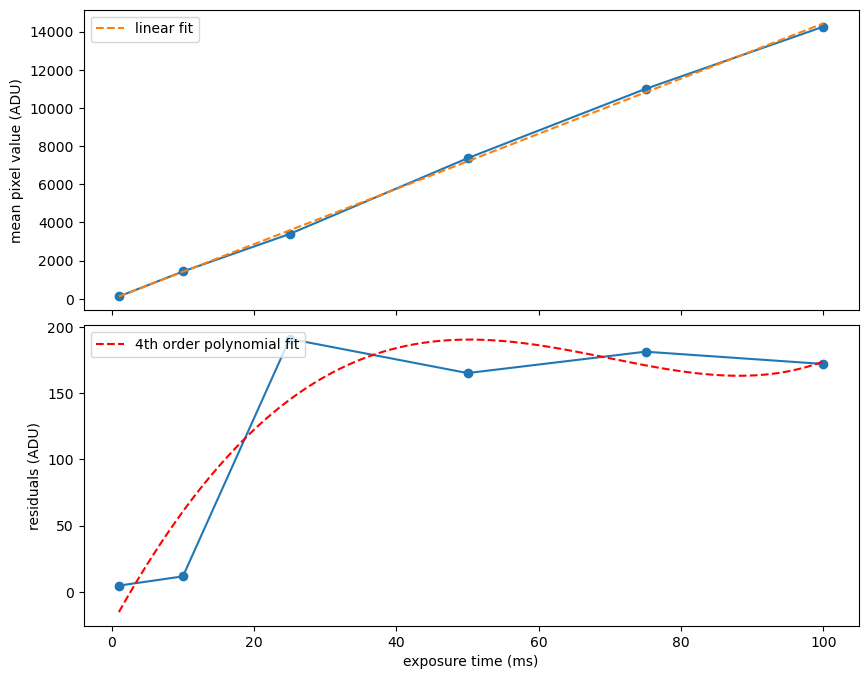

In [19]:
# x values
# tint = [1, 2.5, 5, 10, 25, 50, 100, 200] # ms
# defocused #4
tint = [1, 10, 25, 50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000] # ms
tint_smooth = np.linspace(min(tint), max(tint[:6]), 500)

# linear fit
coefs = np.polyfit(tint[:6], means[:6], 1)
fit_fn = np.poly1d(coefs)

# residuals between data and linear fit
residuals = np.abs(means[:6] - fit_fn(tint[:6]))
residual_poly_coefs = np.polyfit(tint[:6], residuals, 4)  
residual_poly_fn = np.poly1d(residual_poly_coefs)

# residuals to polynomial fit
residuals_to_poly_fit = residuals - residual_poly_fn(tint[:6])

# Calculate RMS of residuals to 4th order polynomial fit
rms_residuals_to_poly_fit = np.sqrt(np.mean(residuals_to_poly_fit**2))

# subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))


# plot tint vs brightness, linear fit
ax1.plot(tint[:6], means[:6], '-o')
ax1.plot(tint[:6], fit_fn(tint[:6]), '--', label='linear fit')
ax1.set_xticklabels([])
ax1.set_ylabel("mean pixel value (ADU)")
ax1.legend()

# plot residuals
ax2.plot(tint[:6], residuals[:6], '-o')
ax2.plot(tint_smooth, residual_poly_fn(tint_smooth), '--', label='4th order polynomial fit', color='red')
ax2.set_xlabel("exposure time (ms)")
ax2.set_ylabel("residuals (ADU)")
ax2.legend(loc='upper left')

print("RMS of residuals to 4th order polynomial fit:", rms_residuals_to_poly_fit)
plt.subplots_adjust(hspace=0.05)
plt.show()

RMS of residuals to 4th order polynomial fit: 7.136277520893289e-12


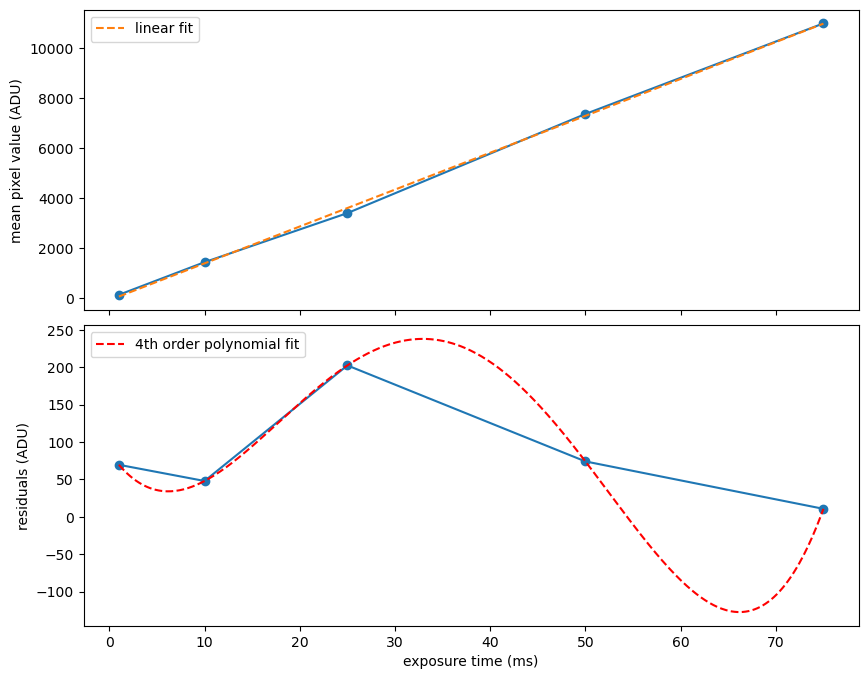

In [10]:
############## try with one pixel: 7%, more points ##############
# average data and darks over 10 exposures
datas_avg = [np.median(data, axis=0) for data in datas]
darks_avg = [np.median(dark, axis=0) for dark in darks]

# subtract darks from data files
datas_sub = [data - dark for data, dark in zip(datas_avg, darks_avg)]

# slice data to get region w/ laser; find region manually with ds9
# defocused #4
datas_slice = [data[311, 314] for data in datas_sub]

# get mean pixel value in region; this corresponds to the brightness(?)
means = [np.median(data) for data in datas_slice]

# x values
# defocused #4
tint = [1, 10, 25, 50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000] # ms
tint_smooth = np.linspace(min(tint), max(tint[:5]), 500)

# linear fit
coefs = np.polyfit(tint[:5], means[:5], 1)
fit_fn = np.poly1d(coefs)

# residuals between data and linear fit
residuals = np.abs(means[:5] - fit_fn(tint[:5]))
residual_poly_coefs = np.polyfit(tint[:5], residuals, 4)  
residual_poly_fn = np.poly1d(residual_poly_coefs)

# residuals to polynomial fit
residuals_to_poly_fit = residuals - residual_poly_fn(tint[:5])

# Calculate RMS of residuals to 4th order polynomial fit
rms_residuals_to_poly_fit = np.sqrt(np.mean(residuals_to_poly_fit**2))

# subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))


# plot tint vs brightness, linear fit
ax1.plot(tint[:5], means[:5], '-o')
ax1.plot(tint[:5], fit_fn(tint[:5]), '--', label='linear fit')
ax1.set_xticklabels([])
ax1.set_ylabel("mean pixel value (ADU)")
ax1.legend()

# plot residuals
ax2.plot(tint[:5], residuals[:5], '-o')
ax2.plot(tint_smooth, residual_poly_fn(tint_smooth), '--', label='4th order polynomial fit', color='red')
ax2.set_xlabel("exposure time (ms)")
ax2.set_ylabel("residuals (ADU)")
ax2.legend(loc='upper left')

print("RMS of residuals to 4th order polynomial fit:", rms_residuals_to_poly_fit)
plt.subplots_adjust(hspace=0.05)
plt.show()

In [11]:
# check nonlinearity at shorter and longer exposure times (like in paper): 5%, 7%
# in paper, nonlinear between 0-25, 225-255 reads at 400 fps -> 0-62.5, 562.5-637.5 ms
###################### 5% ########################


In [12]:
###################### 7% ########################
# from one pixel test, 7% is mostly linear